Importing the modules

In [10]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [18]:
from sklearn.neural_network import MLPRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [22]:
import tensorflow as tf

In [23]:
import statsmodels.api as sm

In [24]:
from pickle import dump
from pickle import load

In [25]:
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [31]:
dataset = pd.read_excel('./SCFP2009panel.xlsx')

In [32]:
type(dataset)

pandas.core.frame.DataFrame

In [33]:
dataset.shape

(19285, 515)

In [34]:
dataset.describe()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
count,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,19285.000000,...,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,1.928500e+04,19285.0
mean,2222.613689,22229.136894,5868.854779,51.647654,3.228157,14.072855,3.055535,1.314752,0.876588,3.792585,...,9.768241e+05,7.842138e+05,5.230099e+05,1.513447e+05,4.315485e+05,2.546299e+05,3.037898e+05,5.416303e+05,4.306108e+05,57.0
std,1275.293152,12752.931600,3881.525292,15.662512,1.494929,2.733539,1.055146,0.464429,1.200590,1.598757,...,1.142686e+07,1.869723e+07,1.360353e+07,5.184665e+06,3.384363e+07,4.677663e+06,3.916706e+06,2.036640e+07,2.116043e+07,0.0
min,1.000000,11.000000,0.885319,19.000000,1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,...,-1.000000e+02,-1.000000e+02,-1.016805e+08,-2.603585e+02,-9.962049e+07,-1.000000e+02,-8.168880e+06,-1.009656e+02,-1.000000e+02,57.0
25%,1130.000000,11302.000000,1992.217143,40.000000,2.000000,12.000000,2.000000,1.000000,0.000000,3.000000,...,-5.405405e+00,-2.115196e+01,-6.457549e+00,-2.867388e+01,0.000000e+00,0.000000e+00,0.000000e+00,-3.562493e+01,-2.584808e+01,57.0
50%,2233.000000,22333.000000,6756.245225,51.000000,3.000000,14.000000,3.000000,1.000000,0.000000,4.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.794657e+01,0.000000e+00,57.0
75%,3323.000000,33234.000000,8538.990444,62.000000,4.000000,16.000000,4.000000,2.000000,2.000000,5.000000,...,0.000000e+00,1.692806e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.225191e+02,6.344615e+01,57.0
max,4423.000000,44235.000000,17895.936632,95.000000,6.000000,17.000000,4.000000,2.000000,10.000000,6.000000,...,5.000000e+08,1.095825e+09,7.471537e+08,3.094213e+08,1.870849e+09,2.717647e+08,1.225332e+08,8.860001e+08,1.721023e+09,57.0


Adding columns for ricky, riskless and risk tolerance attibutes

In [36]:
Average_SP500_2007=1478
Average_SP500_2009=948

In [37]:
dataset['RiskFree07']=dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07']
dataset['RT07']=dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])

In [38]:
dataset['RiskFree09']=dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09']
dataset['RT09']=dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])*(Average_SP500_2009/Average_SP500_2007)

In [39]:
dataset.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,RiskFree07,Risky07,RT07,RiskFree09,Risky09,RT09
0,1,11,11668.134198,47,3,12,2,1,0,2,...,0.0,93.125197,270.403054,57,7994.813847,0.0,0.0,16000,17000,0.330422
1,1,12,11823.456494,47,3,12,2,1,0,2,...,0.0,93.125197,249.593620,57,7994.813847,0.0,0.0,19000,18000,0.312036
2,1,13,11913.228354,47,3,12,2,1,0,2,...,0.0,93.125197,209.233358,57,7984.457871,0.0,0.0,13000,12000,0.307876
3,1,14,11929.394266,47,3,12,2,1,0,2,...,0.0,93.125197,209.273158,57,7984.457871,0.0,0.0,25000,13000,0.219429
4,1,15,11917.722907,47,3,12,2,1,0,2,...,0.0,93.125197,232.690767,57,7994.813847,0.0,0.0,17000,12000,0.265410


Creating copy for data frame

In [41]:
dataset2=copy.deepcopy(dataset)
dataset2.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,RiskFree07,Risky07,RT07,RiskFree09,Risky09,RT09
0,1,11,11668.134198,47,3,12,2,1,0,2,...,0.0,93.125197,270.403054,57,7994.813847,0.0,0.0,16000,17000,0.330422
1,1,12,11823.456494,47,3,12,2,1,0,2,...,0.0,93.125197,249.593620,57,7994.813847,0.0,0.0,19000,18000,0.312036
2,1,13,11913.228354,47,3,12,2,1,0,2,...,0.0,93.125197,209.233358,57,7984.457871,0.0,0.0,13000,12000,0.307876
3,1,14,11929.394266,47,3,12,2,1,0,2,...,0.0,93.125197,209.273158,57,7984.457871,0.0,0.0,25000,13000,0.219429
4,1,15,11917.722907,47,3,12,2,1,0,2,...,0.0,93.125197,232.690767,57,7994.813847,0.0,0.0,17000,12000,0.265410


Calculate Percentage change in risk tolerance

In [43]:
dataset2['Percentage Change']=abs(dataset2['RT09']/dataset2['RT07']-1)

Remove rows which have null values present or outliners present

In [45]:
print('Null value : ', dataset2.isnull().values.any())

Null value :  True


In [46]:
dataset2 = dataset2.replace([np.inf, -np.inf], np.nan)

In [47]:
dataset2 = dataset2.dropna(axis=0)

In [48]:
print('Null value : ', dataset2.isnull().values.any())

Null value :  False


Let us plot the risk tolerance of 2007 and 2009.

<Axes: xlabel='RT07'>

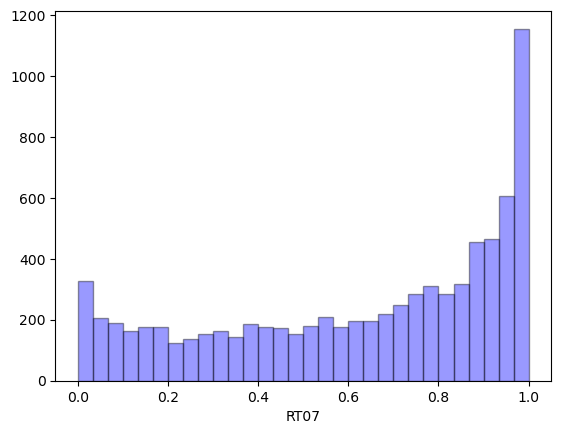

In [50]:
sns.distplot(dataset2['RT07'], hist=True, kde=False, bins=30, color='blue', hist_kws={'edgecolor':'black'})

This plot shows that in 2007, the risk tolerance of peole was higher indicating that the risky assets were more.

<Axes: xlabel='RT09'>

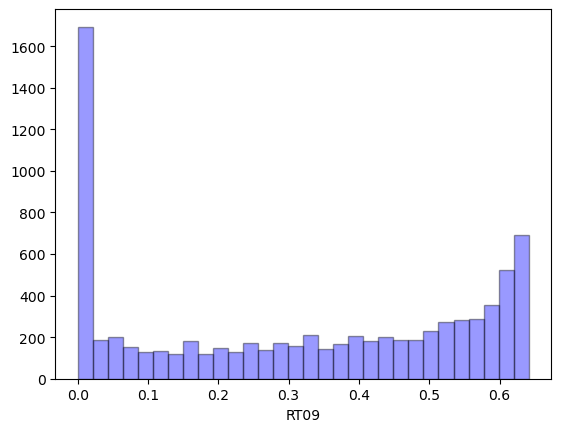

In [52]:
sns.distplot(dataset2['RT09'], hist=True, kde=False, bins=30, color='blue', hist_kws={'edgecolor':'black'})

This plot shows that in 2009, the risk tolerance of peole was lower indicating that the risky assets were less.

Keeping only those users whose risk tolerance percentage change <10% as they are the intelligent investors.

In [55]:
dataset3 = copy.deepcopy(dataset2) 

In [56]:
dataset3 = dataset3[dataset3['Percentage Change']<=.1]

In [57]:
dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2

In [58]:
dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)

In [59]:
dataset3.drop(labels=['Percentage Change'], axis=1, inplace=True)

In [60]:
dataset3.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I,RiskFree07,Risky07,RiskFree09,Risky09,TrueRiskTolerance
60,14,141,13732.681713,77,6,12,2,1,0,6,...,12.956921,0.0,1000.080237,-35.900702,57,1.170225e+04,2.899673e+03,11000,5000,0.199511
425,95,951,43.840398,55,4,17,4,1,1,5,...,0.000000,0.0,-16.807607,-54.021909,57,1.102911e+06,2.226535e+06,1354500,30550000,0.641458
1122,253,2533,297.850586,85,6,17,4,1,0,5,...,18.876864,0.0,1061.195805,0.000000,57,2.148865e+06,3.075725e+06,70000,824000,0.589943
1190,270,2701,7184.506057,40,2,12,2,1,3,3,...,0.000000,0.0,19.213085,-100.000000,57,2.122975e+03,1.656956e+03,12300,25000,0.434127
1228,279,2794,4340.608277,70,5,12,2,1,0,5,...,127.436546,0.0,93.125197,-53.466186,57,1.788477e+05,5.488668e+04,331500,175000,0.228218


Feature Selection

In [62]:
keep_list = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','TrueRiskTolerance']

In [63]:
drop_list=[col for col in dataset3.columns if col not in keep_list]

In [64]:
dataset3.drop(labels=drop_list,axis=1,inplace=True)

In [65]:
dataset3.head()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTolerance
60,77,2,1,0,3,3.141680e+04,4,2.152490e+05,0.199511
425,55,4,1,1,2,2.779588e+06,2,4.964759e+07,0.641458
1122,85,4,1,0,2,3.727417e+05,4,5.837768e+07,0.589943
1190,40,2,1,3,1,5.324882e+04,3,2.688929e+05,0.434127
1228,70,2,1,0,2,3.716767e+04,3,2.015066e+06,0.228218


Plotting heatmap and scatter_matrix

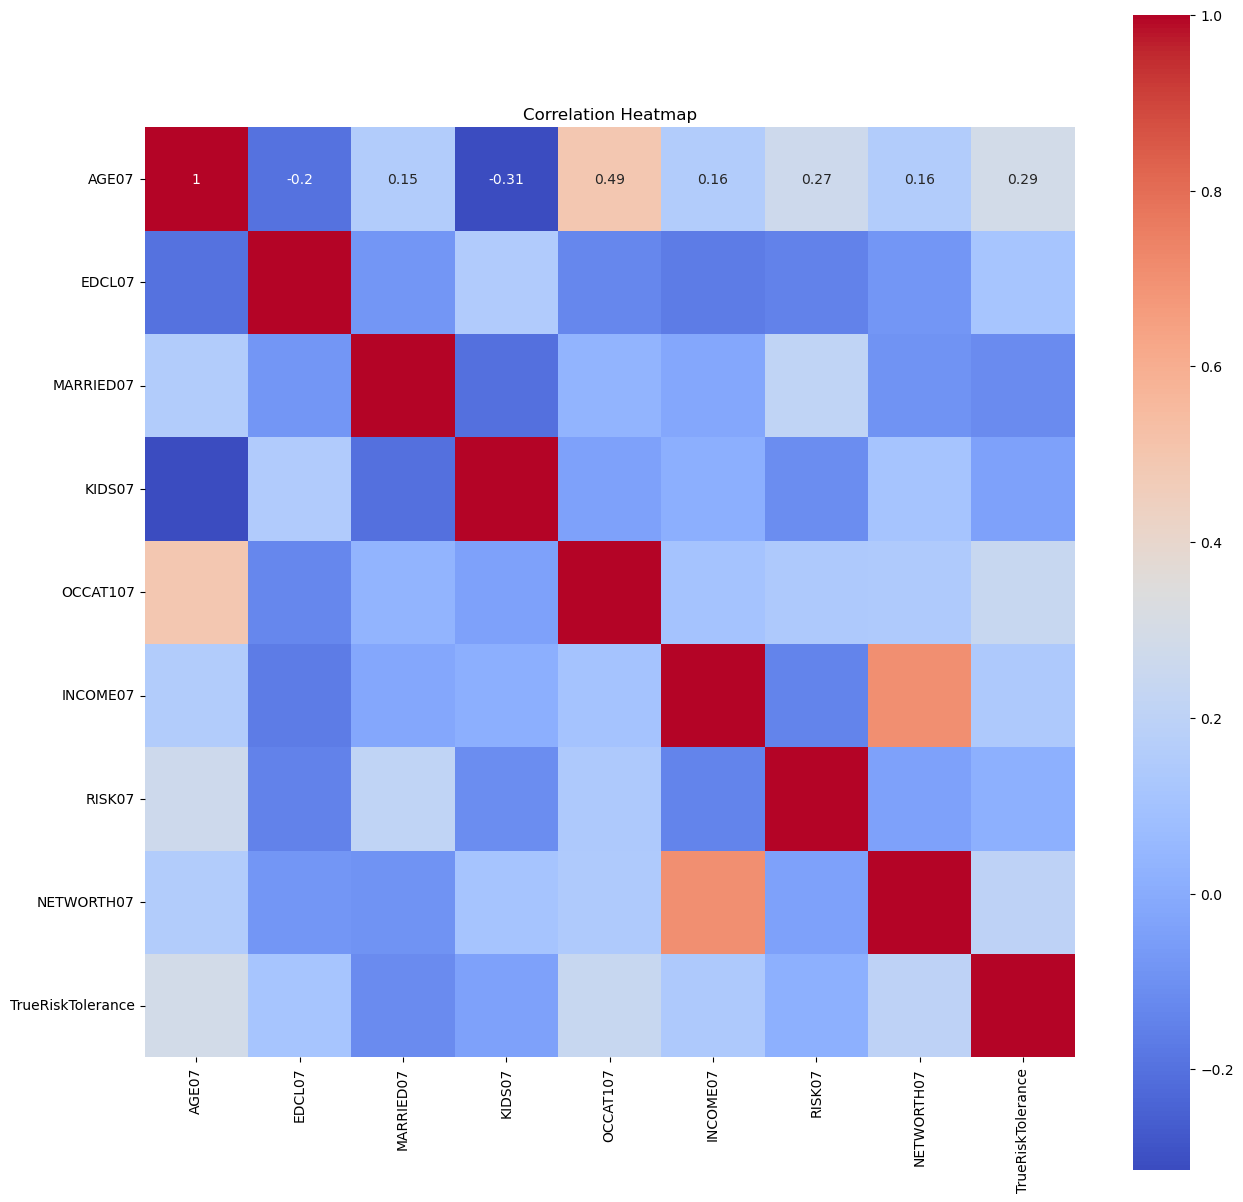

In [67]:
correlation=dataset3.corr()
plt.figure(figsize=(15, 15))
plt.title('Correlation Heatmap')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='coolwarm')
plt.show()

<Figure size 1500x1500 with 0 Axes>

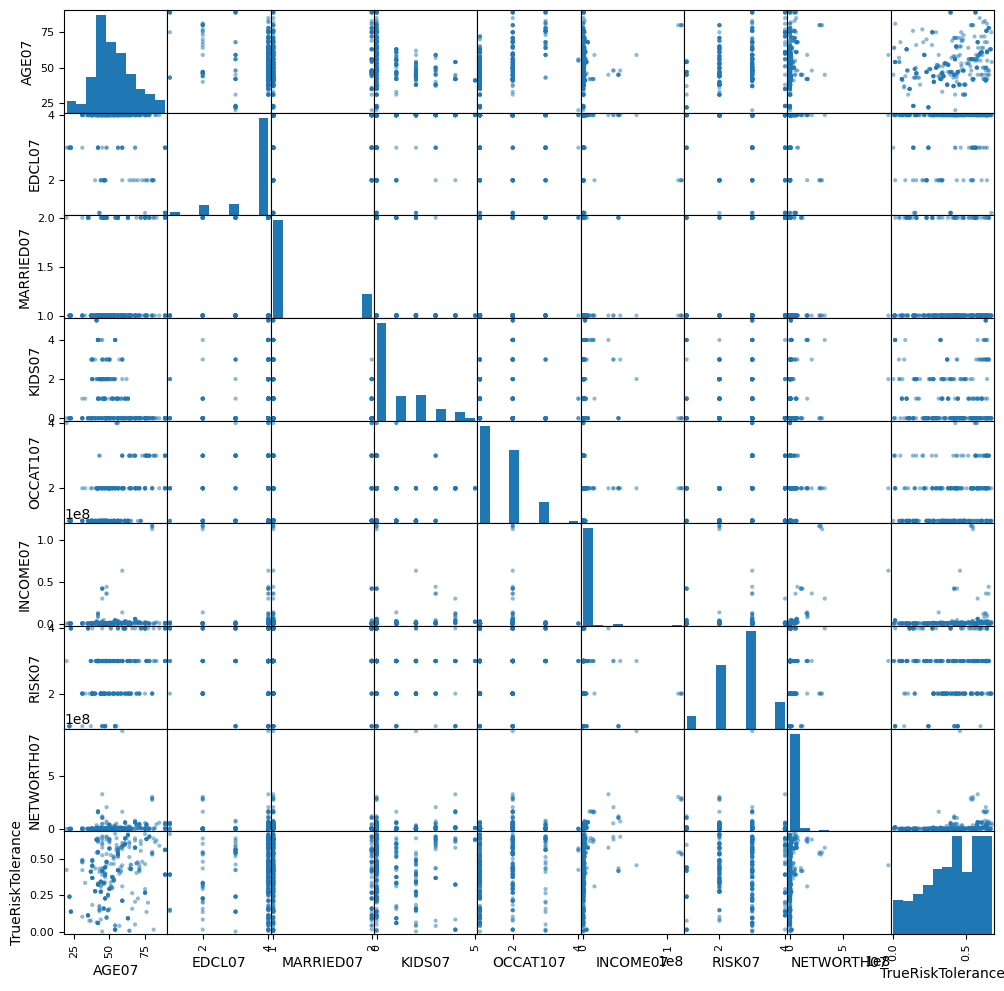

In [68]:
plt.figure(figsize=(15, 15))
scatter_matrix(dataset3, figsize=(12, 12))
plt.show()

We can see that there is a high correlation between new worth and income of an individual. Also we can see that as number of kids increases or a person gets married, risk tolerance decreases.

Evaluate Algorithms and Models

Train Test Split

In [91]:
y=dataset3["TrueRiskTolerance"]
x=dataset3.loc[:,dataset3.columns!="TrueRiskTolerance"]
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.2, random_state=3)

In [93]:
num_folds=10
scoring='r2'
seed=3

Compare Models and Algorithms

In [96]:
models=[]
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

K - Fold Cross Validation

In [164]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=None, shuffle=False)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.105127 (0.103969)
LASSO: -0.023692 (0.118324)
EN: -0.031108 (0.117770)
KNN: -0.409462 (0.166883)
CART: -0.596288 (0.173677)
SVR: -0.101586 (0.092881)
ABR: -0.387057 (0.096933)
GBR: -0.652974 (0.103829)
RFR: -0.741612 (0.079644)
ETR: -0.749891 (0.103701)


Algorithm Comparison

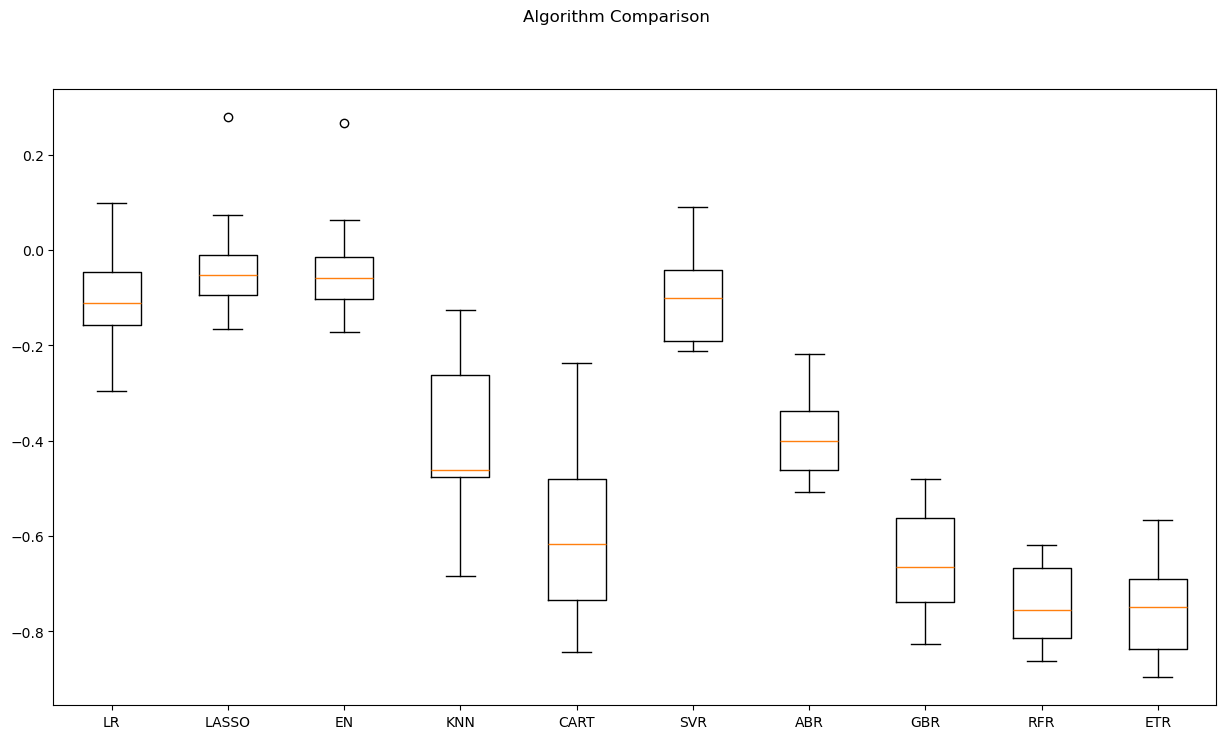

In [167]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

Inference - Non linear models perform much better than linear ones, i.e., a non linear relationship between Risk Tolerance and variables used to predict it. So we will use Random Forest Regressor for further development.

Model Tuning and Grid Search

In [175]:
param_grid = {'n_estimators': [50,100,150,200,250,300,350,400]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=None, shuffle=False)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.737587 using {'n_estimators': 250}
0.734976 (0.075287) with: {'n_estimators': 50}
0.727074 (0.081909) with: {'n_estimators': 100}
0.732864 (0.082297) with: {'n_estimators': 150}
0.735906 (0.079804) with: {'n_estimators': 200}
0.737587 (0.081904) with: {'n_estimators': 250}
0.728827 (0.087510) with: {'n_estimators': 300}
0.733121 (0.081256) with: {'n_estimators': 350}
0.737499 (0.084004) with: {'n_estimators': 400}


Finalise the Model

In [178]:
model = RandomForestRegressor(n_estimators = 250)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=250)

In [180]:
from sklearn.metrics import r2_score
predictions_train = model.predict(X_train)
print(r2_score(Y_train, predictions_train))

0.9619640958486995


In [182]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
predictions = model.predict(X_test)
print(mean_squared_error(Y_test, predictions))
print(r2_score(Y_test, predictions))

0.0074121165301830345
0.7727832699530153


From the mean square error and R2 shown above for the test set, the results look good.

Feature Importance and Features Intuition

[0.23564397 0.02456461 0.01441202 0.04416298 0.02560906 0.23355895
 0.05409164 0.36795678]


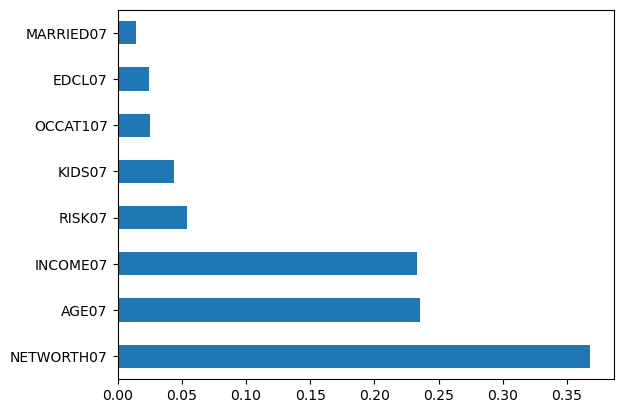

In [187]:
model = RandomForestRegressor(n_estimators= 200,n_jobs=-1)
model.fit(X_train,Y_train)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Income and networth followed by age and willingness to take risk are the key variables to decide the risk tolerance.

Save Model for Later Use

In [191]:
filename = 'finalized_model_risk_tolerance.sav'
dump(model, open(filename, 'wb')) #save model in disk

In [193]:
# load the model from disk
loaded_model = load(open(filename, 'rb'))

In [195]:
# estimate accuracy on testing set
predictions = loaded_model.predict(X_test)
result = mean_squared_error(Y_test, predictions)
print(r2_score(Y_test, predictions))
print(result)

0.7556293365280001
0.007971701000353531


We demonstrated that machine learning models can objectively analyze how different investors behave in a changing market and identify the factors that influence their risk appetite.